# Import Libraries & Font & File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

In [2]:
plt.rc('font', family='Arial Unicode MS') # For MacOS
mpl.rcParams['axes.unicode_minus'] = False  

In [3]:
#Bring file into the notebook
idg = pd.read_csv('/Users/dtive/Documents/GitHub/Kaggle/IMDB-Analysis/data/contentDataGenre.csv')
idp = pd.read_csv('/Users/dtive/Documents/GitHub/Kaggle/IMDB-Analysis/data/contentDataPrime.csv')
idr = pd.read_csv('/Users/dtive/Documents/GitHub/Kaggle/IMDB-Analysis/data/contentDataRegion.csv')

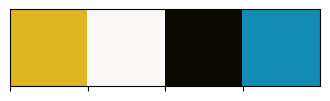

In [4]:
#imdb & Youtube color palette
imdb_palette = ['#deb522','#fcf7f7','#0c0b00','#128bb5']

#show netflix color palette
sns.palplot(imdb_palette)


In [5]:
#Analyze the heads of the data
idg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219213 entries, 0 to 219212
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dataId  219213 non-null  int64 
 1   genre   219213 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [6]:
idp.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do..."
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...


In [7]:
#change certificate null values to 'Not Rated'
idp['certificate'].fillna('Not Rated', inplace=True)


In [8]:
idr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127932 entries, 0 to 127931
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dataId  127932 non-null  int64 
 1   region  127932 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [9]:
#join idg, idp, idr
id = idg.merge(idp, on='dataId', how='left')
id = id.merge(idr, on='dataId', how='left')



In [10]:
id

,dataId,genre,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region
0,102795,Drama,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,Not Rated,"The story revolves around Mohanasundaram, a re...",India
1,102796,Documentary,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,United States
2,102796,Comedy,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,United States
3,102797,Documentary,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,United States
4,102797,Horror,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279473,500,Sci-Fi,movie,"I, Robot",115,2004,-1,549787,7.1,144800000,PG-13,"In 2035, a technophobic cop investigates a cri...",Germany
279474,0,Drama,movie,The Shawshank Redemption,142,1994,-1,2715939,9.3,28340000,R,"Over the course of several years, two convicts...",United States
279475,0,Drama,movie,The Shawshank Redemption,142,1994,-1,2715939,9.3,28340000,R,"Over the course of several years, two convicts...",United States
279476,0,Drama,movie,The Shawshank Redemption,142,1994,-1,2715939,9.3,28340000,R,"Over the course of several years, two convicts...",United States


In [11]:
#find overlapping data
idg['dataId'].isin(idp['dataId']).value_counts()


True    219213
Name: dataId, dtype: int64

In [12]:
#leave only one of the overlapping data
id = id.drop_duplicates(subset=['dataId'], keep='first')


In [13]:
id

,dataId,genre,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region
0,102795,Drama,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,Not Rated,"The story revolves around Mohanasundaram, a re...",India
1,102796,Documentary,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,United States
3,102797,Documentary,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,United States
5,102798,Horror,movie,Don't Look,71,2018,-1,349,2.8,-1,Not Rated,"In the tradition of classic horror movies, ""Do...",United States
6,102799,Drama,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279450,496,Action,tvSeries,Titans,45,2018,2023,104123,7.5,-1,TV-MA,A team of young superheroes combat evil and ot...,United States
279453,497,Drama,tvSeries,The Man in the High Castle,60,2015,2019,103828,7.9,-1,TV-MA,In a dystopian America dominated by Nazi Germa...,United States
279462,498,Action,tvSeries,Justified,44,2010,2015,103427,8.6,-1,TV-MA,U.S. Marshal Raylan Givens is reassigned from ...,United States
279465,499,Comedy,tvSeries,Misfits,60,2009,2013,103121,8.2,-1,TV-MA,A group of young offenders doing community ser...,United Kingdom


In [14]:
#movie and twshow count and pie chart by plotly
id['contentType'].value_counts()

fig = px.pie(id, values=id['contentType'].value_counts(), names=id['contentType'].value_counts().index, title='Movie and TV Show Count')
fig.show()




Movies are almost 3 times more on IMDB database

In [15]:
#different region count 
id['region'].value_counts()

#bar chart for top 5 regions
fig = px.bar(id['region'].value_counts().head(10), x=id['region'].value_counts().head(10).index, y=id['region'].value_counts().head(10), title='Top 5 Regions')
fig.show()



In all Movies and TV Shows, US has the most number of Movies and TV Shows followed by UK, India

In [16]:
#different region count on movie
id[id['contentType']=='movie']['region'].value_counts()

#diffenrent region count on tv show
id[id['contentType']=='tvSeries']['region'].value_counts()

#bar chart for top 5 regions on movie
fig = px.bar(id[id['contentType']=='movie']['region'].value_counts().head(10), x=id[id['contentType']=='movie']['region'].value_counts().head(10).index, y=id[id['contentType']=='movie']['region'].value_counts().head(10), title='Top 5 Regions on Movie')
fig.show()

#bar chart for top 5 regions on tv show
fig = px.bar(id[id['contentType']=='tvSeries']['region'].value_counts().head(10), x=id[id['contentType']=='tvSeries']['region'].value_counts().head(10).index, y=id[id['contentType']=='tvSeries']['region'].value_counts().head(10), title='Top 5 Regions on TV Show')
fig.show()


On each Movie and TV Show, US has the most number of Movies and TV Shows followed by UK.
But after these two countries, rankings are different.

In [17]:
id4 = id[id['contentType'] == 'movie']
id5 = id4[id4['releaseYear'] != -1]
id5

,dataId,genre,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region
0,102795,Drama,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,Not Rated,"The story revolves around Mohanasundaram, a re...",India
5,102798,Horror,movie,Don't Look,71,2018,-1,349,2.8,-1,Not Rated,"In the tradition of classic horror movies, ""Do...",United States
6,102799,Drama,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...,United Kingdom
10,102801,Action,movie,Super Stooges vs the Wonder Women,105,1974,-1,349,4.5,-1,PG,Three men with supernatural powers interfere i...,Italy
19,102802,Drama,movie,Maassab (The Teacher),116,2018,-1,349,7.7,-1,Not Rated,A high ranking administrator who has quit his ...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278687,246,Drama,movie,Ex Machina,108,2014,-1,555410,7.7,25440000,R,A young programmer is selected to participate ...,United Kingdom
278690,247,Crime,movie,Zodiac,157,2007,-1,554672,7.7,33080000,R,"Between 1968 and 1983, a San Francisco cartoon...",United States
278693,248,Action,movie,The Bourne Identity,119,2002,-1,554137,7.9,121660000,PG-13,"A man is picked up by a fishing boat, bullet-r...",United States
278702,249,Action,movie,Top Gun: Maverick,130,2022,-1,550110,8.3,718730000,PG-13,"After thirty years, Maverick is still pushing ...",United States


In [18]:
#find average rating of per year and include how many data in each year
id5_year = id5.groupby('releaseYear')['rating'].agg(['mean', 'count'])
#reset index of id5_year
id5_year = id5_year.reset_index()
#make bubble chart of id5_year
fig = px.scatter(id5_year, x='releaseYear', y='mean', size='count', color='count', hover_name='releaseYear', size_max=60, trendline="lowess",trendline_options=dict(frac=0.1), trendline_color_override="red")
#title of the chart
fig.update_layout(title_text='Average Rating of Movie per Year')
#x axis name  
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Average Rating')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()


On the Movies, gradually decreasing but after 2020, it is increasing again.

In [19]:
#find all release year which is not -1
id1 = id[id['releaseYear'] != -1]
#gind all end year which is not -1
id2 = id1[id1['endYear'] != -1]
#only tvseries
id3 = id2[id2['contentType'] == 'tvSeries']
id3

,dataId,genre,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region
113688,58539,Drama,tvSeries,Orgoglio,100,2004,2006,104,7.4,-1,Not Rated,1912. The dramatic love story between Anna Obr...,Italy
113692,58541,Animation,tvSeries,Willa's Wild Life,-1,2008,2011,104,7.9,-1,TV-Y7,A young girl's backyard is home to a variety o...,Canada
113701,58545,Animation,tvSeries,Super Chicken,-1,1967,1969,104,8.1,-1,Not Rated,Super Chicken is an animated cartoon segment t...,United States
113705,58547,Action,tvSeries,A Divisão,40,2019,2023,104,8.0,-1,Not Rated,"In 1997, Rio de Janeiro was shaken by a wave o...",Brazil
113709,58549,Drama,tvSeries,Ki Kore Bolbo Tomay,22,2019,2021,104,7.8,-1,Not Rated,Ki Kore Bolbo Tomay is a Bengali drama series ...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279446,494,Comedy,tvSeries,My Name Is Earl,22,2005,2009,105347,7.8,-1,TV-14,"A ne'er do well wins $100,000 in the lottery a...",United States
279450,496,Action,tvSeries,Titans,45,2018,2023,104123,7.5,-1,TV-MA,A team of young superheroes combat evil and ot...,United States
279453,497,Drama,tvSeries,The Man in the High Castle,60,2015,2019,103828,7.9,-1,TV-MA,In a dystopian America dominated by Nazi Germa...,United States
279462,498,Action,tvSeries,Justified,44,2010,2015,103427,8.6,-1,TV-MA,U.S. Marshal Raylan Givens is reassigned from ...,United States


In [21]:
#find average rating of per year and include how many data in each year
id3_year = id3.groupby('releaseYear')['rating'].agg(['mean', 'count'])
#reset index of id3_year
id3_year = id3_year.reset_index()
#make bubble chart of id3_year
fig = px.scatter(id3_year, x='releaseYear', y='mean', size='count', color='count', hover_name='releaseYear', size_max=60, trendline="lowess",trendline_options=dict(frac=0.1), trendline_color_override="red")
#title of the chart
fig.update_layout(title_text='Average Rating of TV Show per Year')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Average Rating')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()


Average rating in TV Show is gradually decreaseing.

However, during 2010 to 2020, rating has been increased, but in 2021, 2022, collapsed.

Maybe COVID made rating collapse.

In [22]:
#make new column 'duration' by subtracting endYear from releaseYear
id3['duration'] = id3['endYear'] - id3['releaseYear']
id3
#decending order of duration
id3.sort_values(by='duration', ascending=False)
#find average rating of per duration and include how many data in each duration
id3_durat = id3.groupby('duration')['rating'].agg(['mean', 'count'])
#reset index of id3_durat
id3_durat = id3_durat.reset_index()
#make bubble chart of id3_durattrendline
fig = px.scatter(id3_durat, x='duration', y='mean', size='count', color='count', hover_name='duration', size_max=60, trendline="lowess",trendline_options=dict(frac=0.1), trendline_color_override="red")
#title of the chart
fig.update_layout(title='Average Rating by Duration of TV Show')
#x axis name
fig.update_xaxes(title_text='Duration (Year)')
#y axis name
fig.update_yaxes(title_text='Average Rating')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()


Duration makes better on their rating?

Until year 6, it kinda makes it better but after that, does not have relevance.

But for TV Shows, to success in their rating, it is good to make until 5-6 year, since it has best possibility to have best average rating